In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [28]:
features = pd.read_csv("./regression-data/train_features.csv")
features


,Id,item,user,timestamp
0,0,2980,38103,1623788214253
1,1,8180,139619,1502584120859
2,2,9125,67372,1514072474499
3,3,11159,259339,1561561119682
4,4,11090,275444,1568116090724
...,...,...,...,...
814435,814435,8123,83332,1514326142501
814436,814436,9225,92243,1555582773465
814437,814437,5747,6147,1503772059645
814438,814438,10809,70253,1571008520254


In [29]:
label = pd.read_csv("./regression-data/train_label.csv")
label

,Id,rating
0,0,5
1,1,5
2,2,5
3,3,5
4,4,3
...,...,...
814435,814435,4
814436,814436,5
814437,814437,4
814438,814438,4


In [30]:
combined = pd.merge(features, label, on='Id')
combined


,Id,item,user,timestamp,rating
0,0,2980,38103,1623788214253,5
1,1,8180,139619,1502584120859,5
2,2,9125,67372,1514072474499,5
3,3,11159,259339,1561561119682,5
4,4,11090,275444,1568116090724,3
...,...,...,...,...,...
814435,814435,8123,83332,1514326142501,4
814436,814436,9225,92243,1555582773465,5
814437,814437,5747,6147,1503772059645,4
814438,814438,10809,70253,1571008520254,4


In [31]:
#display the how often the same user entry is in the dataset 
combined['user'].value_counts()






2137      404
10345     337
16827     297
2901      294
731       271
         ... 
230298      1
49517       1
86254       1
223981      1
75420       1
Name: user, Length: 288211, dtype: int64

/tmp/ipykernel_55944/2081173428.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(combined["item"])


<Axes: xlabel='item', ylabel='Density'>

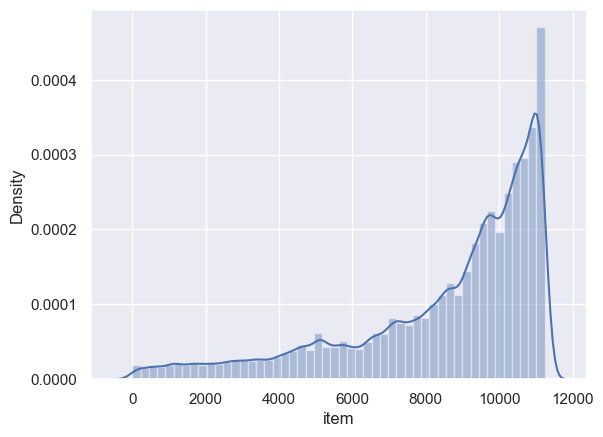

In [32]:
# histogram
sns.distplot(combined["item"])


In [33]:
# skewness and kurtosis
print("Skewness: %f" % combined["rating"].skew())
print("Kurtosis: %f" % combined["rating"].kurt())

Skewness: -1.849322
Kurtosis: 2.631977


<Axes: xlabel='user', ylabel='item'>

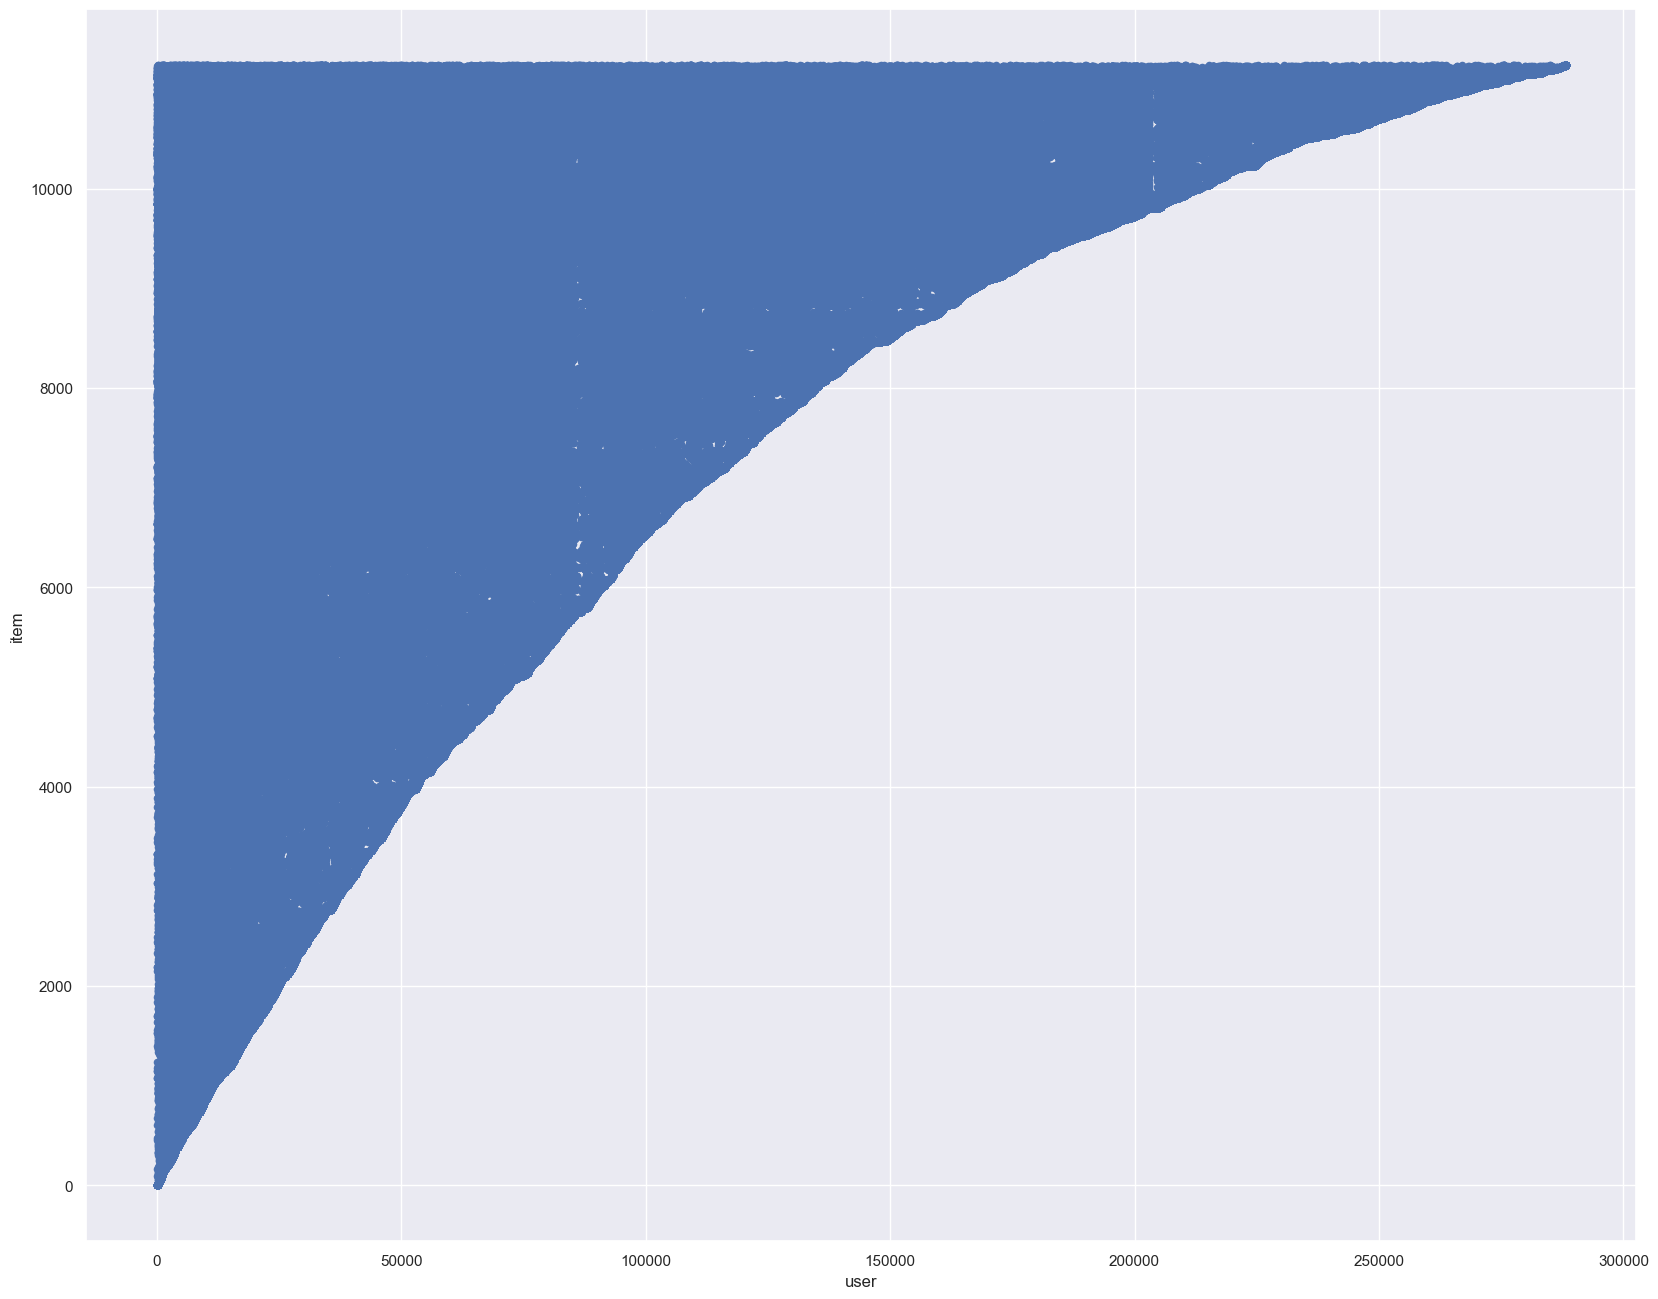

In [34]:
# scatter plot timestamp/rating
xa = "user"
ya = "item"

data = pd.concat([combined[ya], combined[xa]], axis=1)
data.plot.scatter(x=xa, y=ya, figsize=(20, 16))

In [35]:
combined.describe()


,Id,item,user,timestamp,rating
count,814440.000000,814440.000000,814440.000000,8.144400e+05,814440.000000
mean,407219.500000,8537.291911,92553.570576,1.546311e+12,4.352511
std,235108.720958,2666.208097,79772.243228,4.389116e+10,1.090982
min,0.000000,0.000000,0.000000,1.182960e+12,1.000000
25%,203609.750000,7297.000000,23801.000000,1.519653e+12,4.000000
50%,407219.500000,9507.000000,68968.000000,1.549482e+12,5.000000
75%,610829.250000,10559.000000,148078.250000,1.575512e+12,5.000000
max,814439.000000,11241.000000,288210.000000,1.631048e+12,5.000000


In [36]:
# count duplicates in user and item columns, ignore id and timestamp
print(combined[["user", "item"]].duplicated().sum())
# remove duplicates
combined = combined.drop_duplicates(subset=["user", "item"], keep="first")
print(combined[["user", "item"]].duplicated().sum())

8794
0


Id              Axes(0.125,0.53;0.352273x0.35)
item         Axes(0.547727,0.53;0.352273x0.35)
user            Axes(0.125,0.11;0.352273x0.35)
timestamp    Axes(0.547727,0.11;0.352273x0.35)
dtype: object

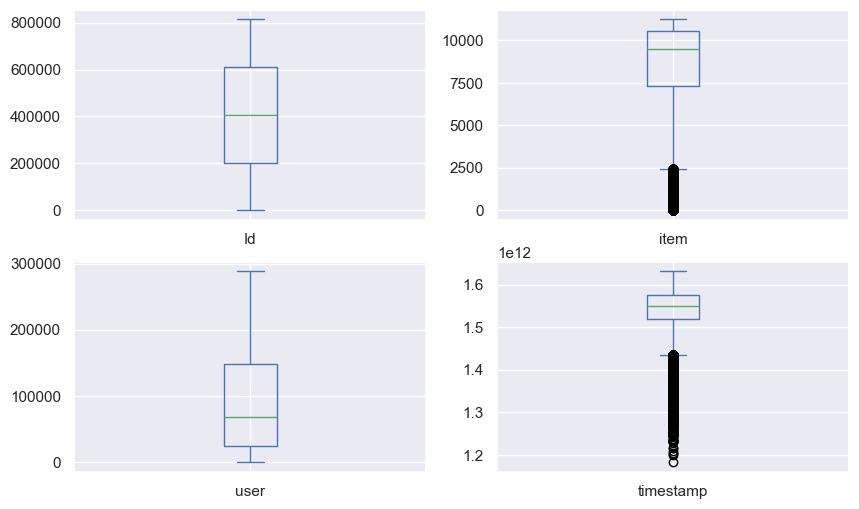

In [37]:
features.plot(kind="box",subplots=True,layout=(2,2),figsize=(10,6))

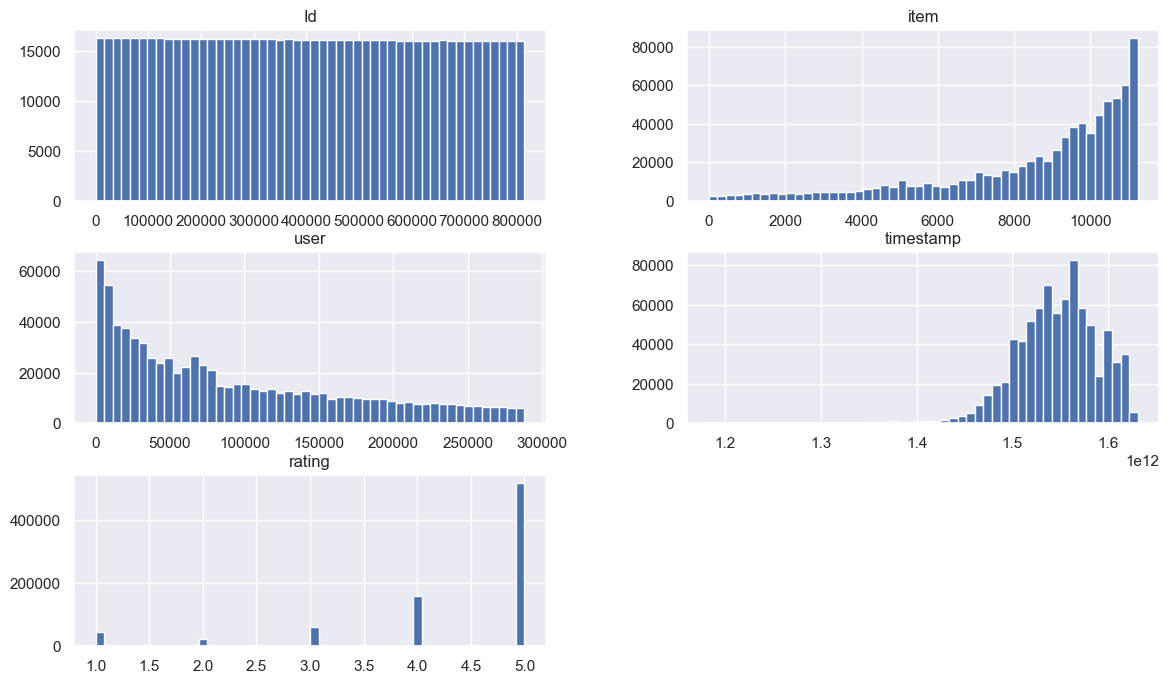

In [38]:
combined.hist(figsize=(14,8),bins=50)
plt.show()

/home/leon/.conda/envs/SeminarIntelligentSystemsRegression/lib/python3.10/site-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


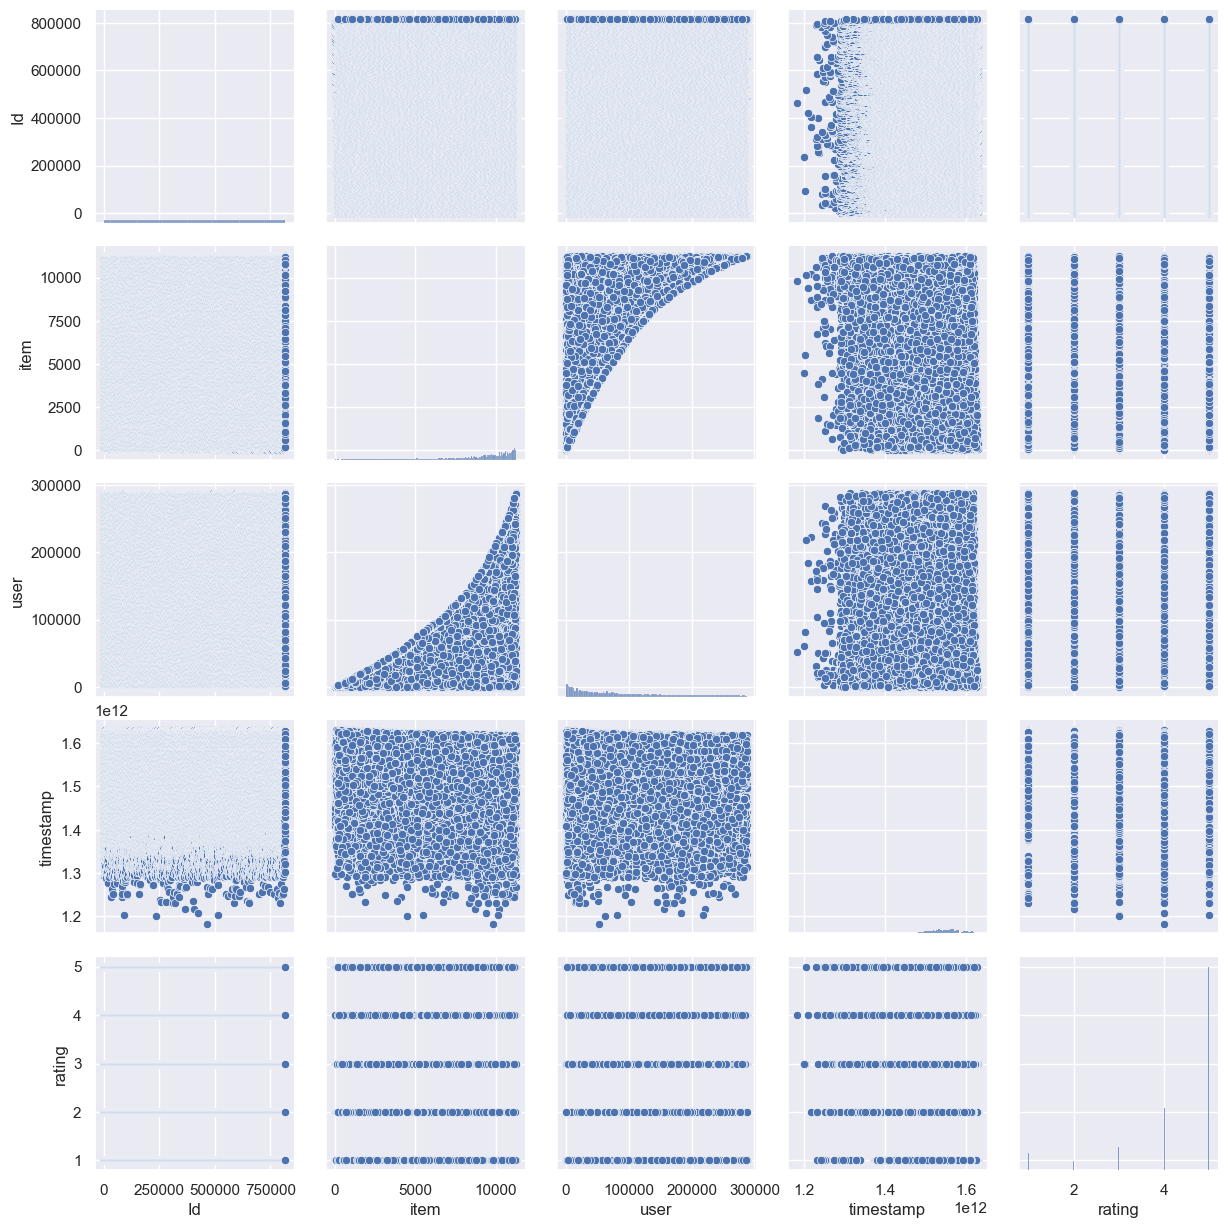

In [39]:
# scatterplot
sns.set()
cols = [
    "Id",
    "item",
    "user",
    "timestamp",
    "rating",
]
sns.pairplot(combined[cols], size=2.5)
plt.show()

In [40]:
features.drop_duplicates(inplace=True)
features

,Id,item,user,timestamp
0,0,2980,38103,1623788214253
1,1,8180,139619,1502584120859
2,2,9125,67372,1514072474499
3,3,11159,259339,1561561119682
4,4,11090,275444,1568116090724
...,...,...,...,...
814435,814435,8123,83332,1514326142501
814436,814436,9225,92243,1555582773465
814437,814437,5747,6147,1503772059645
814438,814438,10809,70253,1571008520254


<Axes: >

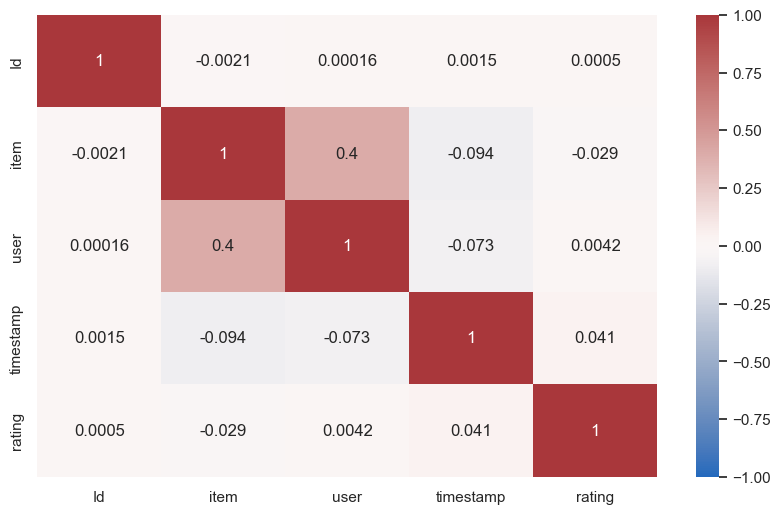

In [41]:
matrix =  combined.corr()
plt.figure(figsize=(10,6))
sns.heatmap(matrix,cmap="vlag",annot=True, vmin=-1, vmax=1)

In [42]:
combined.head()
#data = (data.drop(['feature_2'],axis=1,inplace=True))
#dat

,Id,item,user,timestamp,rating
0,0,2980,38103,1623788214253,5
1,1,8180,139619,1502584120859,5
2,2,9125,67372,1514072474499,5
3,3,11159,259339,1561561119682,5
4,4,11090,275444,1568116090724,3


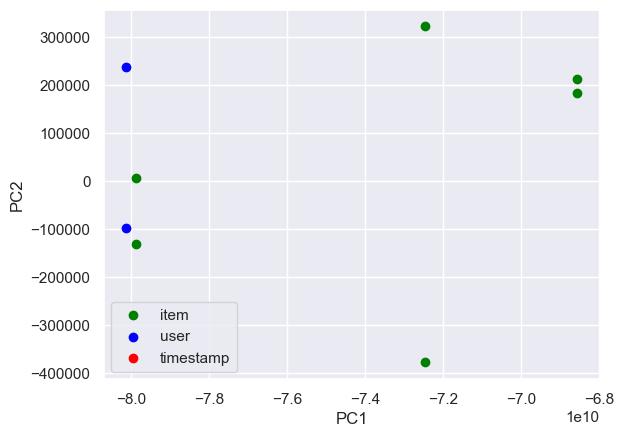

In [43]:
from sklearn.decomposition import PCA

# create a PCA object with 2 components
pca = PCA(n_components=2)

# fit the PCA object to the combined dataframe
pca.fit(features)

# transform the combined dataframe using the PCA object
transformed = pca.transform(features)

# create a new dataframe with the transformed data
pca_df = pd.DataFrame(transformed, columns=['PC1', 'PC2'])

# create a dictionary to map colors to features
color_dict = {'item': 'green', 'user': 'blue', 'timestamp': 'red'}

# create a scatter plot for each feature
for feature in color_dict.keys():
    indices = features[feature] == 1
    plt.scatter(pca_df.loc[indices, 'PC1'], pca_df.loc[indices, 'PC2'], color=color_dict[feature], label=feature)

# add legend and axis labels
plt.legend()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


In [44]:
# missing data
total = combined.isnull().sum().sort_values(ascending=False)
percent = (combined.isnull().sum() / combined.isnull().count()).sort_values(
    ascending=False
)
missing_data = pd.concat([total, percent], axis=1, keys=["Total", "Percent"])
missing_data.head(5)

,Total,Percent
Id,0,0.0
item,0,0.0
user,0,0.0
timestamp,0,0.0
rating,0,0.0


In [45]:
from sklearn.preprocessing import StandardScaler

# create a StandardScaler object
scaler = StandardScaler()

# fit the scaler object to the combined dataframe
scaler.fit(combined)

# transform the combined dataframe using the scaler object
standardized = scaler.transform(combined)

# create a new dataframe with the standardized data
standardized_df = pd.DataFrame(standardized, columns=combined.columns)

# print the outer range of the standardized distribution
low_range = standardized_df[combined.columns].min()
high_range = standardized_df[combined.columns].max()


print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)



outer range (low) of the distribution:
Id          -1.725850
item        -3.212409
user        -1.160661
timestamp   -8.288576
rating      -3.073481
dtype: float64

outer range (high) of the distribution:
Id           1.738218
item         1.017668
user         2.458501
timestamp    1.930674
rating       0.593695
dtype: float64


/tmp/ipykernel_55944/117868791.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(combined['rating'], fit=stats.norm);


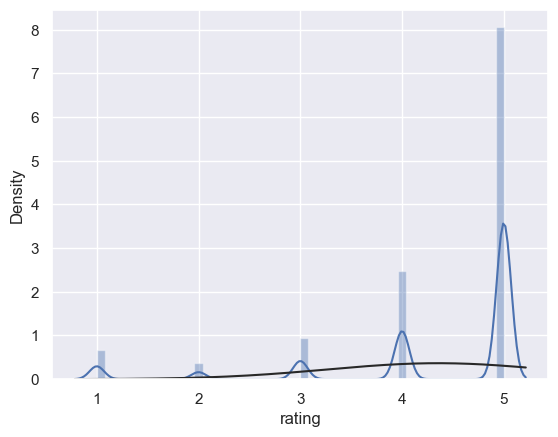

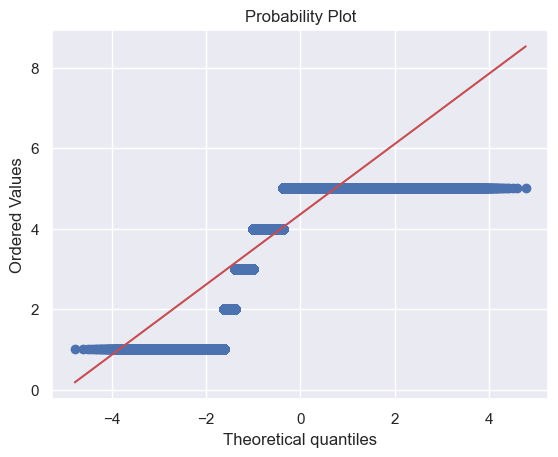

In [46]:
import scipy.stats as stats

# histogram and normal probability plot
sns.distplot(combined['rating'], fit=stats.norm);
fig = plt.figure()
res = stats.probplot(combined['rating'], plot=plt)

In [47]:
y = combined['rating']

In [48]:
X = combined.drop(['rating'], axis=1)


In [49]:
from sklearn.tree import DecisionTreeRegressor
# create a DecisionTreeRegressor object
tree = DecisionTreeRegressor(random_state=42)

# fit the model to the training data
tree.fit(features, label)


DecisionTreeRegressor(random_state=42)

In [50]:
# make predictions on the test set
predictions = tree.predict(features)
print(predictions)

[[0.00000e+00 5.00000e+00]
 [1.00000e+00 5.00000e+00]
 [2.00000e+00 5.00000e+00]
 ...
 [8.14437e+05 4.00000e+00]
 [8.14438e+05 4.00000e+00]
 [8.14439e+05 1.00000e+00]]


In [51]:
print(X.head())
print(y.head())
tree.predict(X.head())


   Id   item    user      timestamp
0   0   2980   38103  1623788214253
1   1   8180  139619  1502584120859
2   2   9125   67372  1514072474499
3   3  11159  259339  1561561119682
4   4  11090  275444  1568116090724
0    5
1    5
2    5
3    5
4    3
Name: rating, dtype: int64


array([[0., 5.],
       [1., 5.],
       [2., 5.],
       [3., 5.],
       [4., 3.]])

In [52]:
test_features = pd.read_csv("./regression-data/test_features.csv")

# Create a submission dataframe
predicted_labels_df = pd.DataFrame({"Id": predictions[0], "Predicted": predictions[1]})

predicted_labels_df.to_csv("./regression-data/test_label.csv", index=False)